In [1]:
import os
import numpy as np
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
test_path = "dog_breed/test"

test_len = 0
for i in os.listdir(test_path):
    test_len += len(os.listdir( os.path.join( test_path, i) ))

print(f'test : {test_len}')

test : 240


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1./255)

data = data_gen.flow_from_directory(
    test_path, class_mode='categorical', color_mode='rgb', shuffle=True,
    target_size=(200,200), batch_size=240
)

X, y = data.next()
y = np.argmax(y, axis=-1)
X.shape, y.shape

Found 240 images belonging to 12 classes.


C:\Users\Owner6\Anaconda3\envs\jh\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


((240, 200, 200, 3), (240,))

In [4]:
from tensorflow.keras.models import load_model

model = load_model('model/1/17-0.96250.h5')

In [5]:
predict = np.argmax(model.predict(X), axis=-1)

In [6]:
data.class_indices

{'Beagle': 0,
 'Chihuahua': 1,
 'Corgi': 2,
 'Golden Retriever': 3,
 'Maltese': 4,
 'Pomeranian': 5,
 'Poodle': 6,
 'Pug': 7,
 'Shiba Inu': 8,
 'Siberian Husky': 9,
 'Yorkie': 10,
 'dachshund': 11}

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

def print_scores(y, predict_y, model="model"):
    print(f"{model}'s accuracy : {accuracy_score(y, predict_y)}")

In [8]:
print_scores(y, predict, "model")

model's accuracy : 0.9875


In [17]:
import itertools
import matplotlib.pyplot as plt
# confusion matrix를 그려주는 함수
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False, a1=10, a2=10):
    plt.figure(figsize=(a1,a2))
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.xticks(rotation=90)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{:.2f}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

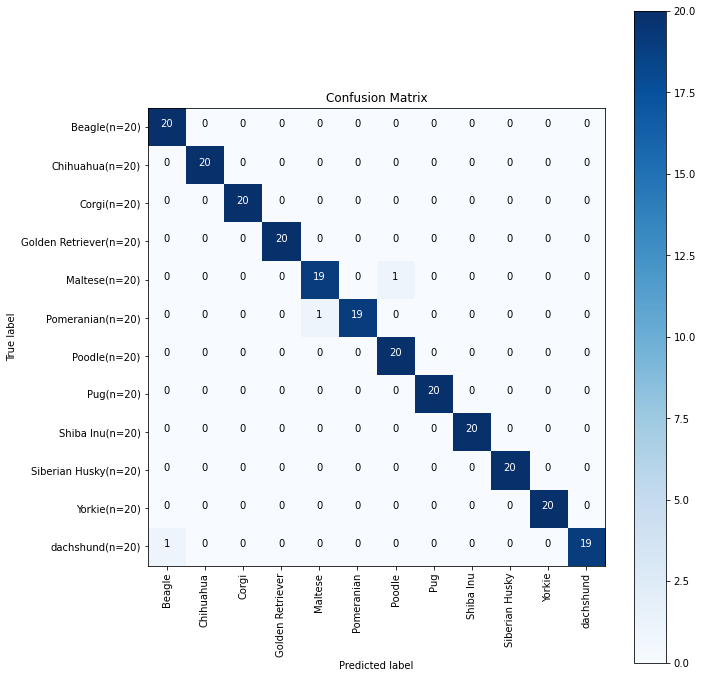

In [18]:
labels = list(data.class_indices.keys())

conf_mat = confusion_matrix(y, predict)
plot_confusion_matrix(conf_mat, labels=labels, normalize=False)

In [20]:
np.where(y != predict)

(array([22, 60, 78], dtype=int64),)

In [40]:
reversed_dict = dict(map(reversed, data.class_indices.items()))
reversed_dict

{0: 'Beagle',
 1: 'Chihuahua',
 2: 'Corgi',
 3: 'Golden Retriever',
 4: 'Maltese',
 5: 'Pomeranian',
 6: 'Poodle',
 7: 'Pug',
 8: 'Shiba Inu',
 9: 'Siberian Husky',
 10: 'Yorkie',
 11: 'dachshund'}

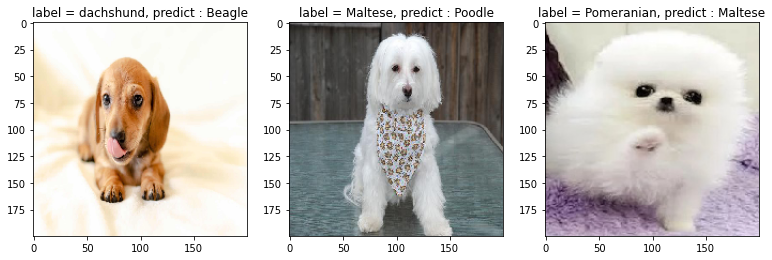

In [42]:
plt.figure(figsize=(13,5))
for idx, i in enumerate(np.where(y != predict)[0]):
    plt.subplot(1, 3, idx + 1)
    plt.title(f'label = {reversed_dict[y[i]]}, predict : {reversed_dict[predict[i]]}')
    plt.imshow(X[i])
plt.show()